# K Means Algorithm

## 1. Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

%matplotlib inline

---

## 2. Problem Statement

You are given Two features, which is generated using the python script in file 'data_generation.py'. Using these features apply K means Algorithm for clustering.

---

## 3. Dataset

Loading the dataset using pandas library.

In [10]:
dataset = pd.read_excel('./kmeans_data.xlsx')

In [11]:
print("Shape of the dataset is: ", dataset.shape)
print("No. of training Examples: ", dataset.shape[0])
print("No. of Features: ", dataset.shape[1])

Shape of the dataset is:  (250, 2)
No. of training Examples:  250
No. of Features:  2


In [12]:
print("The first five elements of the dataset are: \n",dataset.head() )

The first five elements of the dataset are: 
    Feature1  Feature2
0 -1.593796  9.343037
1  4.154515  2.055044
2  5.722930  3.026972
3 -1.545821  9.427067
4 -7.778042 -6.388190


---

## 4. Building the Model

### 4.1 Finding the closet Centroids

In this part we focus on calculating **idx** or also known as $c^{(i)}$, using the formula below

$Formula,$
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
Here, 
- $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ being either of the values: [0,1,2]
- $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
- $||x^{(i)} - \mu_j||$ is the L2-norm
- idx is a one-dimensional array:
    - whose length is equal to the no.of training example = 250
    - it can contain value [0,1,2], which are the index of centroids that the examples are closest to

In [13]:
def find_closest_centroids(X, centroids):
    
    # Defining number of centroids: [0,1] shape
    K = centroids.shape[0]

    # index of cluster centroids that is assigned to the nearest points(X).. It contains values associated with points: [0,1,2]
    idx = np.zeros(X.shape[0], dtype=int)


    for i in range(len(idx)): # iterate through data points (X)
        distance = []
        
        for j in range(K): # iterate through centroids
            val = np.linalg.norm(X[i] - centroids[j])   # Euclidean distance
            distance.append(val)

        # Comparing the distance from diff. centroids and assigning index of the min distance
        idx[i] = np.argmin(distance)
    
    return idx

In [14]:
# Testing the function

# Select an initial set of centroids (3 Centroids): [0,1,2]
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(dataset.values, initial_centroids)

# Print closest centroids for the first five elements
print("First three elements in idx are:", idx[:5])


First three elements in idx are: [0 0 1 0 0]


### 4.2 Computing Centroid means

We compute the centroid mean to move the initial centroid that has been generated. For this we use the formula,
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

where 
* $C_k$ is the set of examples that are assigned to centroid $k$
* $|C_k|$ is the number of examples in the set $C_k$
* $\mu_k = \$$ is the revised centroid
* Eg. say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$, then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [15]:
def compute_centroids(X, idx, K):

    m,n = X.shape

    # np_array containing - index of centroids
    centroids = np.zeros((K,n))

    for i in range(K):                      # iterate through centroids
        count = 0
        avg = 0
        for j in range(len(X)):             # iterate through data points (X)
            if(idx[j] == i):                # if closest centroid is find, avg the coordinates of datapoint to shift centroids
                count += 1
                avg += X[j]
        
        if(count != 0):
            centroids[i] = avg/count
    
    return centroids

In [16]:
# Testing the function
K = 3
centroids = compute_centroids(dataset.values, idx, K)

print("The centroids are:", centroids)


The centroids are: [[-3.41048724  1.29571107]
 [ 5.33462401  1.78728794]
 [ 5.15492652  5.82590117]]


### 4.3 Applying K-means on the dataset

Iterating the **find_closest_centroids** and **compute_centroids** in a loop will optimize the algorithm and will give the best possible value of the centroids

In [18]:
def kMeans(X, initial_centroids, max_iters, plot_progress= False):

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8,6))

    for i in range(max_iters):

        # Output Progress
        print("K-means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Compute new centroids
        centroids = compute_centroids(X, idx, K)
    
    plt.show()
    return centroids, idx

K-means iteration 0/9
K-means iteration 1/9
K-means iteration 2/9
K-means iteration 3/9
K-means iteration 4/9
K-means iteration 5/9
K-means iteration 6/9
K-means iteration 7/9
K-means iteration 8/9
K-means iteration 9/9


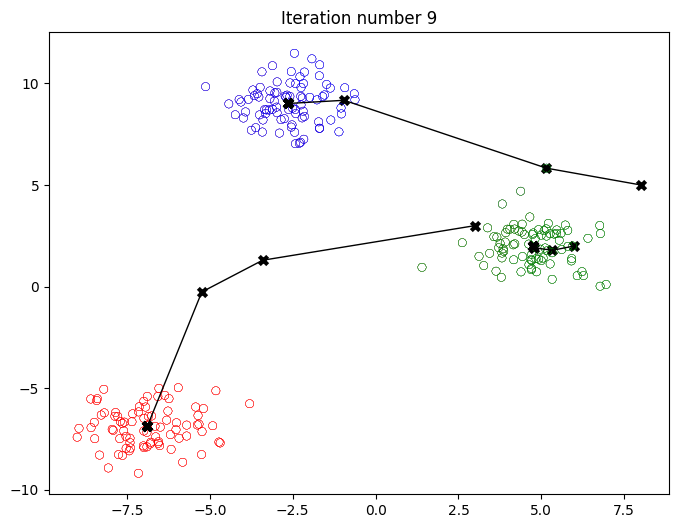

In [19]:
# Testing the function

initial_centroids = np.array([[3,3], [6,2], [8,5]])

centroids, idx = kMeans(dataset.values,initial_centroids, 10, plot_progress=True)

### 4.4 Random Initialization (Centroids)

In [95]:
#The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 

def init_random_centroids(X, k):

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:k]]

    return centroids

K-means iteration 0/9
K-means iteration 1/9
K-means iteration 2/9
K-means iteration 3/9
K-means iteration 4/9
K-means iteration 5/9
K-means iteration 6/9
K-means iteration 7/9
K-means iteration 8/9
K-means iteration 9/9


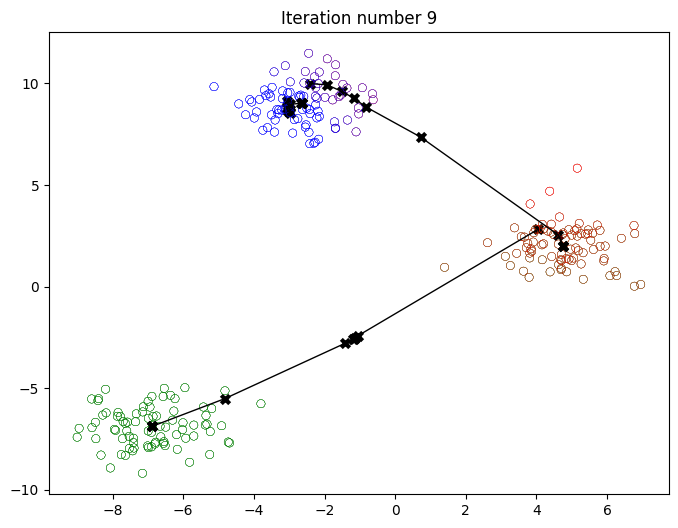

In [99]:
k = 3
max_iters = 10

initial_centroids = init_random_centroids(dataset.values, 3)

centroids, idx = kMeans(dataset.values,initial_centroids, max_iters, plot_progress=True)

---

$$\text{**Lets use K-means to compress image**}$$

## 5. Image Compression

### 5.1 Dataset

In [100]:
org_image = plt.imread('bird_small.png')

#### Visualize the image

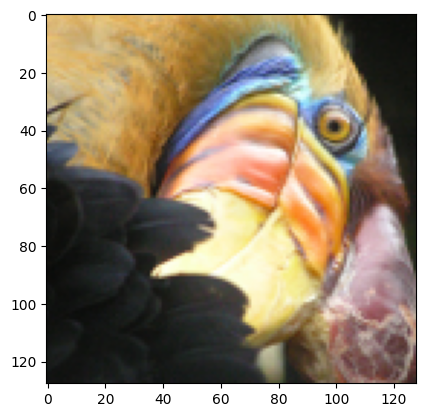

In [101]:
plt.imshow(org_image)

In [102]:
print("Shape of original_img is:", org_image.shape)

Shape of original_img is: (128, 128, 3)


Converting the image to 2-dimensional matrix, so as to run k_means on it

In [103]:
X_img = np.reshape(org_image, (org_image.shape[0] * org_image.shape[1], 3))

### 5.2 Applying K-Means 

In [104]:
k = 15
max_iters = 10

initial_centroids = init_random_centroids(X_img, k)

centroids, idx = kMeans(X_img, initial_centroids, max_iters)

K-means iteration 0/9
K-means iteration 1/9
K-means iteration 2/9
K-means iteration 3/9
K-means iteration 4/9
K-means iteration 5/9
K-means iteration 6/9
K-means iteration 7/9
K-means iteration 8/9
K-means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [105]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [12 12 12 12 12]


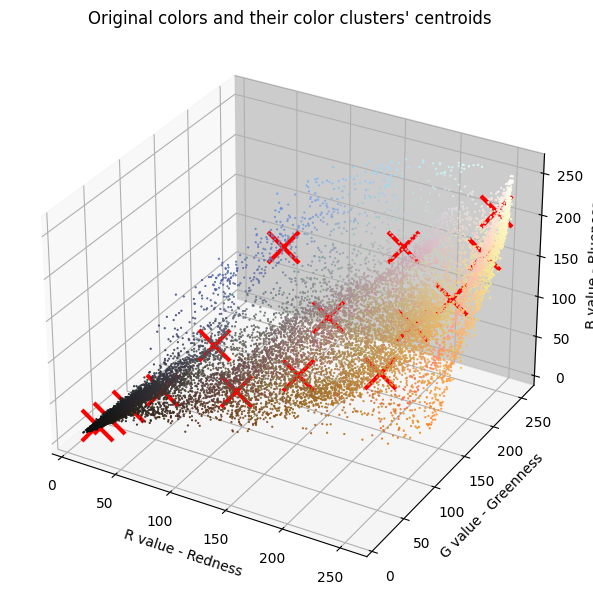

In [106]:
plot_kMeans_RGB(X_img, centroids, idx, k)

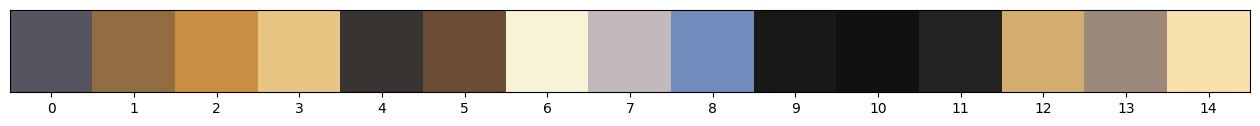

In [107]:
show_centroid_colors(centroids)

### 5.3 Compress the image

In [108]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, org_image.shape) 

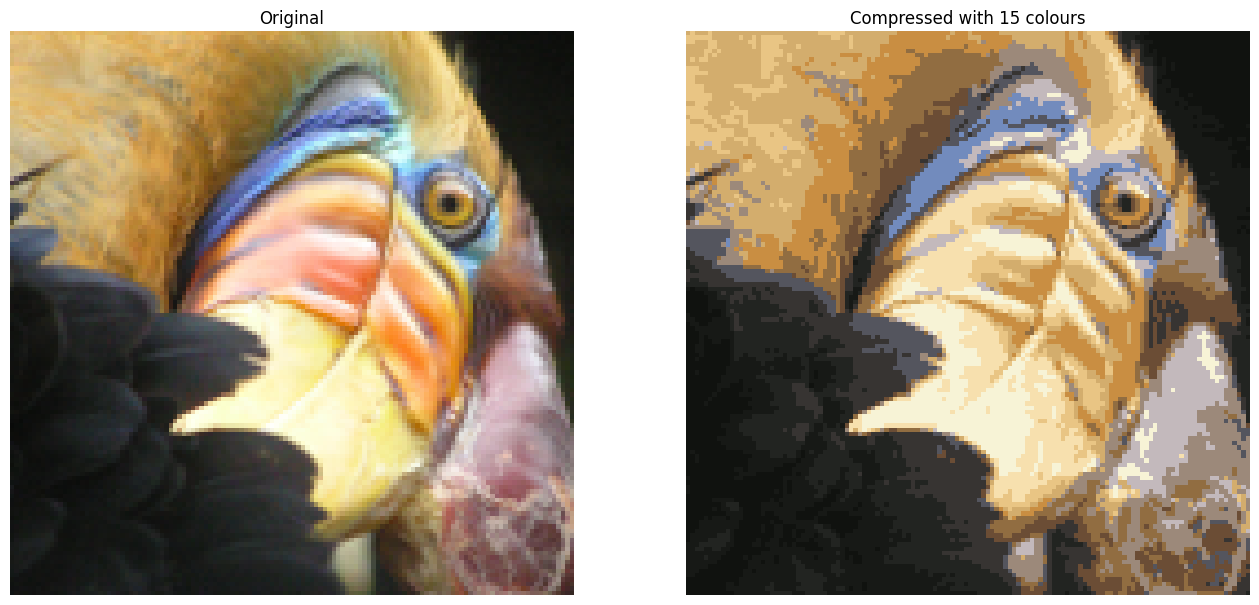

In [110]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(org_image)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%k)
ax[1].set_axis_off()